## Neural Networks with TensorFlow

### Keras
"Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation.

Use Keras if you need a deep learning library that:
- Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
- Supports both convolutional networks and recurrent networks, as well as combinations of the two.
- Runs seamlessly on CPU and GPU."

Keras is a very powerful module that allows us to avoid having to build neural networks from scratch. It also hides a lot of mathematical complexity (that otherwise we would have to implement) inside of helpful packages, modules and methods.

## What is a Neural Network
A deep neural network is a layered representation of data. The term "deep" refers to the presence of multiple layers. Recall that in our core learning algorithms (like linear regression) data was not transformed or modified within the model, it simply existed in one layer. We passed some features to our model, some math was done, an answer was returned. The data was not changed or transformed throughout this process. A neural network processes our data differently. It attempts to represent our data in different ways and in different dimensions by applying specific operations to transform our data at each layer. Another way to express this is that at each layer our data is transformed in order to learn more about it. By performing these transformations, the model can better understand our data and therefore provide a better prediction.

## Activation Function

Activation functions are simply a function that is applied to the weighed sum of a neuron. They can be anything we want but are typically higher order/degree functions that aim to add a higher dimension to our data. We would want to do this to introduce more comolexity to our model. By transforming our data to a higher dimension, we can typically make better, more complex predictions.

A list of some common activation functions and their graphs can be seen below.

- Relu (Rectified Linear Unit)

![alt text](https://yashuseth.files.wordpress.com/2018/02/relu-function.png?w=309&h=274)
This transforms any negative value into 0. For positive values, it equals to their positive value
----
- Tanh (Hyperbolic Tangent)

![alt text](http://mathworld.wolfram.com/images/interactive/TanhReal.gif)
This transform the values between -1 and 1
----
- Sigmoid 

![alt text](https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png)
This transform the values between 0 and 1

## Backpropagation
Backpropagation is the fundemental algorithm behind training neural networks. It is what changes the weights and biases of our network. To fully explain this process, we need to start by discussing something called a cost/loss function.

### Loss/Cost Function
As we now know our neural network feeds information through the layers until it eventually reaches an output layer. This layer contains the results that we look at to determine the prediciton from our network. In the training phase it is likely that our network will make many mistakes and poor predicitions. In fact, at the start of training our network doesn't know anything (it has random weights and biases)!

We need some way of evaluating if the network is doing well and how well it is doing. For our training data we have the features (input) and the labels (expected output), because of this we can compare the output from our network to the expected output. Based on the difference between these values we can determine if our network has done a good job or poor job. If the network has done a good job, we'll make minor changes to the weights and biases. If it has done a poor job our changes may be more drastic.

So, this is where the cost/loss function comes in. This function is responsible for determining how well the network did. We pass it the output and the expected output, and it returns to us some value representing the cost/loss of the network. This effectively makes the networks job to optimize this cost function, trying to make it as low as possible.

Some common loss/cost functions include.
- Mean Squared Error
- Mean Absolute Error
- Hinge Loss

### Gradient descent
"Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model."

### Optimizer
This is simply the function that implements the backpropagation algorithm described above. Here's a list of a few common ones.
- Gradient Descent
- Stochastic Gradient Descent
- Mini-Batch Gradient Descent
- Momentum
- Nesterov Accelerated Gradient

# Creating a Neural Network

In [1]:
# TensorFlow & Keras
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

### Dataset
Dataset included in keras
This data set includes 60.000 images for training and 10.000 images for testing/validation

In [3]:
fashion_data = keras.datasets.fashion_mnist # load data
(train_data, y_train), (test_data, y_test) = fashion_data.load_data() # split into training and testing

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
train_data.shape

(60000, 28, 28)

Tenemos 60.000 imagenes de 28x28 pixels (784 pixels in total)

In [26]:
print(train_data[0,20,27])
print(train_data[0,23,23])

67
194


Our pixels values are between 0 and 255, 0 being black and 255 being white. This means we have a grayscale image as there are no color channels.

In [33]:
y_train[:20]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

Our labels are integers ranging from 0-9. Each integer represents a specific article of clothing. We'll create ar array of label names to indicate which is which.

In [34]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

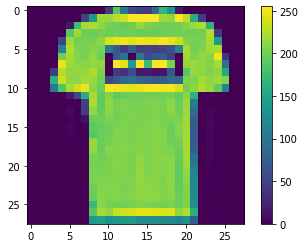

In [44]:
plt.figure() # Make a figure
plt.imshow(train_data[1]) # Show the image
plt.colorbar() # do color bar
plt.grid(False)
plt.show()

### Data Preprocessing

The last step before creating our model is to preprocess our data. This simply means applying some prior transformations to our data before feeding it the model. In this case we will simply scale all our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values.

*Typically, it's a good idea to get all of your input values in a neural network in between 0 and 1 for example. The reason for this is our neural network starts with random weights and biases that are in between the range zero and one. So if we have massive input information and tiny weights, then we're kind of having a bit of a mismatch. And we're gonna make it much more difficult to our NN to actually classify our information.*

In [45]:
train_data = train_data / 255.0
test_data = test_data / 255.0

### Building the model

In [48]:
# We use Sequential NN, basic form of neural network. Information going from the left side to the right side, passing through
# the layers sequentially.
model = keras.Sequential([
    # Inside of here we define the layers that we want in our NN
    keras.layers.Flatten(input_shape=(28,28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'), # hidden layer (2)
    keras.layers.Dense(10, activation='softmax')   # output layer (3)
])

**Layer 1**: This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

**Layer 2**: This is our first and only hidden layer. The dense denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

**Layer 3**: This is our output later and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represnts the probabillity of a given image being one of the 10 different classes. The activation function **softmax** is used on this layer to calculate a probabillity distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.

#### Compile the model
The last step in building the model is to define the loss function, optimizer and metrics we would like to track.

In [50]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

### Training the model

In [52]:
model.fit(train_data, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4969 - accuracy: 0.8260
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3745 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3365 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3121 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2927 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2795 - accuracy: 0.8972
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2678 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2566 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2465 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.238

We got the accuracy on our training data

### Testing the model

In [53]:
test_loss, test_acc = model.evaluate(test_data, y_test, verbose=1)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3287 - accuracy: 0.8860
Test accuracy: 0.8859999775886536


Notice that we got an accuracy that is lower that the one we got in our training data. This is what is called *Overfitting*. Since we use 10 epochs, maybe the model just kind of memorize the data and get good at seeing that data. Whereas, when we pass new data we only get 0.886% of accuracy, which means we overfit our model.

Now, we can start changing parameters (**hyper parameter tuning**) and maybe we can get a better accuracy.

### Making Predictions

In [58]:
predictions = model.predict(test_data)

Sneaker


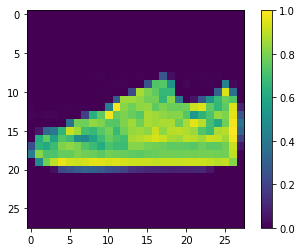

In [70]:
# Para encontrar el indice del mayor valor dentro del array usamos np.argmax
print(class_names[np.argmax(predictions[22])])

plt.figure() # Make a figure
plt.imshow(test_data[22]) # Show the image
plt.colorbar() # do color bar
plt.grid(False)
plt.show()

## Verifying Predictions

Please type an integer number:2545


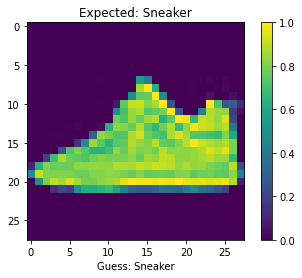

In [98]:
def get_number():
    number = input("Please type an integer number:" )
    if not number.isdigit():
        return "Insert a valid number"
    return number

def verify_predict(number):
    # Expected value
    label = 'Expected: ' + str(class_names[y_test[int(number)]])
    # Predicted value
    xlabel = 'Guess: ' + str(class_names[np.argmax(predictions[int(number)])])

    # Draw actual cloth item
    plt.figure() # Make a figure
    plt.title(label)
    plt.imshow(test_data[int(number)]) # Show the image
    plt.xlabel(xlabel)
    plt.colorbar() # do color bar
    plt.grid(False)
    plt.show()
    
    

num = get_number()
verify_predict(num)